**Data Visualization**

In [39]:
#Importing Libraries for Data Visulization
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [40]:
# Path to the audio file
audio_file = '/kaggle/input/cough-classification-dataset/Cough/cough_1.wav'

# Load the audio file
data, sample_rate = librosa.load(audio_file)

Text(92.34722222222221, 0.5, 'Amplitude')

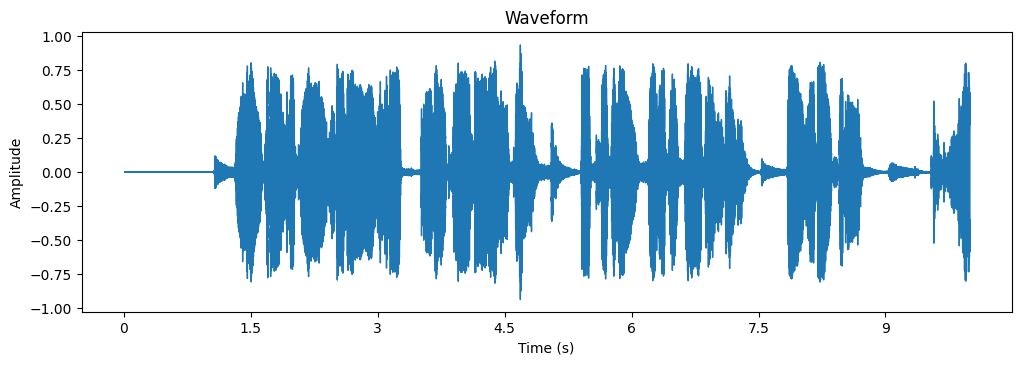

In [42]:
#Wave Form of the Audio Signal
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
librosa.display.waveshow(data, sr=sample_rate)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

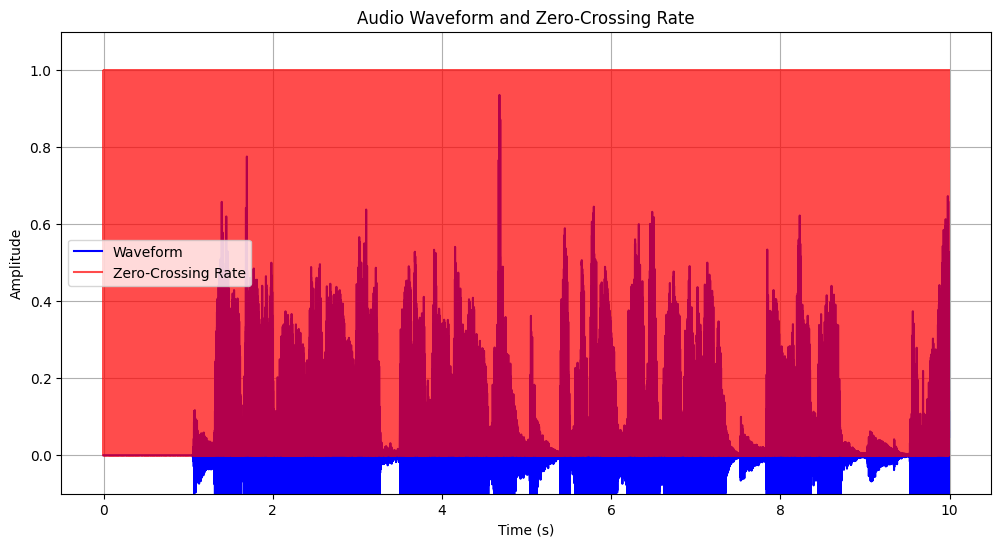

In [43]:
#Zero Crossing Rate

# Compute the zero crossinng rate
zero_crossings = librosa.zero_crossings(data, pad=False)

time = np.arange(len(data)) / float(sample_rate)

#Plotting
plt.figure(figsize=(12, 6))
plt.plot(time, data, label='Waveform', color='blue')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Audio Waveform and Zero-Crossing Rate')
plt.grid(True)
plt.plot(time, zero_crossings, label='Zero-Crossing Rate', color='red', alpha=0.7)
plt.ylim(-0.1, 1.1) 
plt.legend()
plt.show()

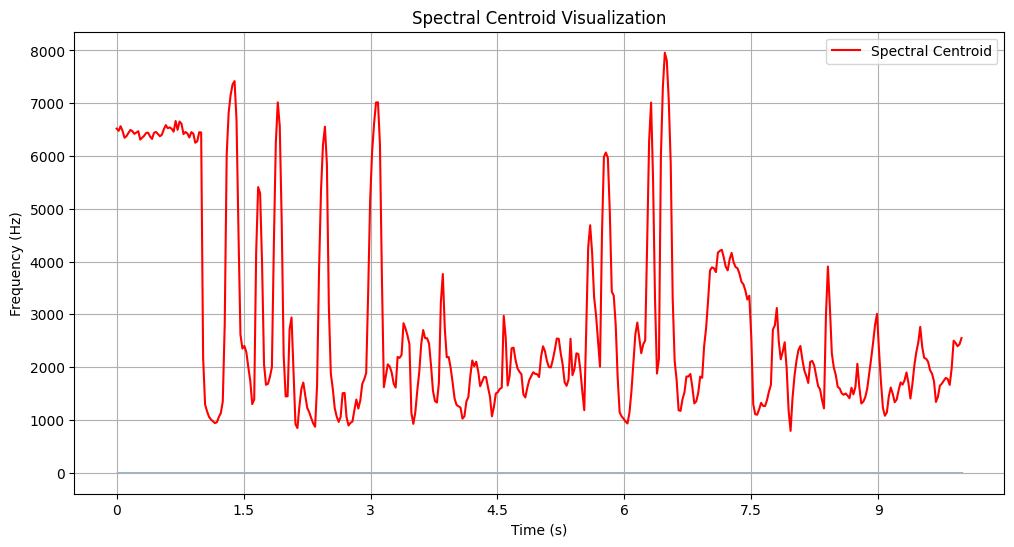

In [44]:
#Spectral Centriod

# Compute the spectral centroid
spectral_centroid = librosa.feature.spectral_centroid(y=data, sr=sample_rate)[0]

# Create a time array corresponding to each frame
time = librosa.times_like(spectral_centroid)

# Plotting the spectral centroid
plt.figure(figsize=(12, 6))
librosa.display.waveshow(data, sr=sample_rate, alpha=0.5)
plt.plot(time, spectral_centroid, color='r', label='Spectral Centroid')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectral Centroid Visualization')
plt.legend()
plt.grid(True)
plt.show()

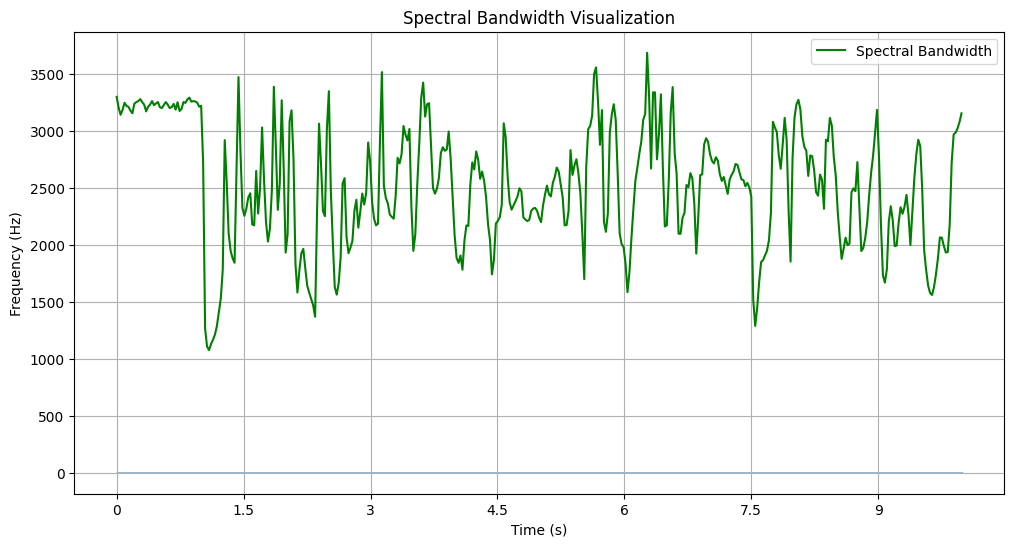

In [45]:
#Spectral Bandwidth

# Compute the spectral bandwidth
spectral_bandwidth = librosa.feature.spectral_bandwidth(y=data, sr=sample_rate)[0]

# Create a time array corresponding to each frame
time = librosa.times_like(spectral_centroid)

# Plotting the spectral bandwidth
plt.figure(figsize=(12, 6))
librosa.display.waveshow(data, sr=sample_rate, alpha=0.5)
plt.plot(time, spectral_bandwidth, color='g', label='Spectral Bandwidth')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectral Bandwidth Visualization')
plt.legend()
plt.grid(True)
plt.show()

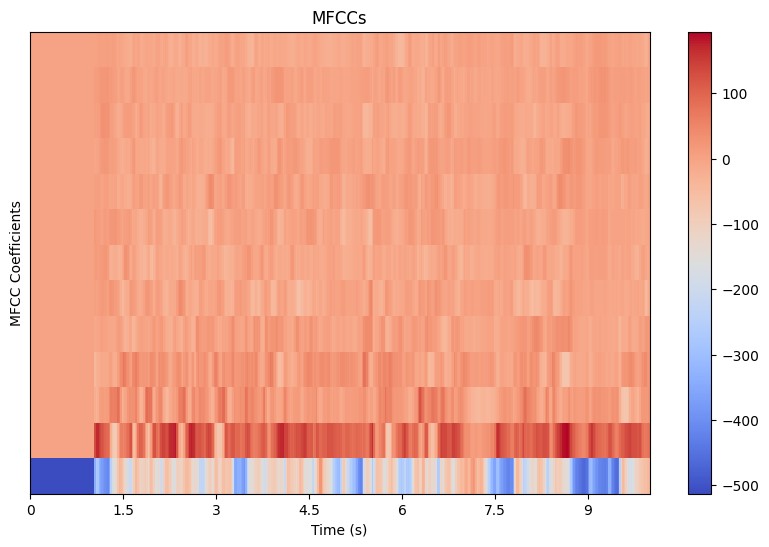

In [46]:
#Mel Frequency Cepstral Coefficients 

#Calculating of MFCC
mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=13)

#Plotting
plt.figure(figsize=(10, 6))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCCs')
plt.xlabel('Time (s)')
plt.ylabel('MFCC Coefficients')
plt.show()


**Feature Extraction and Data Preprocessing**

In [ ]:
import os
import librosa
import pandas as pd
import numpy as np

In [ ]:
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)
    y, _ = librosa.effects.trim(y, top_db=20)

    zcr = np.mean(librosa.feature.zero_crossing_rate(y))
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
    spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
    rms_energy = np.mean(librosa.feature.rms(y=y))
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
    mfccs_mean = np.mean(mfccs, axis=1)

    features = list(mfccs_mean) + [zcr, spectral_centroid, spectral_bandwidth, spectral_rolloff, rms_energy]
    
    return features

In [ ]:
folder_path ='/kaggle/input/cough-classification-dataset/Cough'

data = []

for file_name in os.listdir(folder_path):
    if file_name.endswith('.wav'):
        file_path = os.path.join(folder_path, file_name)
        features = extract_features(file_path)
        features.insert(0, file_name)
        features.append('cough')
        data.append(features)

columns = ['file_name'] + [f'mfcc_{i}' for i in range(1, 21)] + [
            'zcr', 'spectral_centroid', 'spectral_bandwidth', 'spectral_rolloff', 'rms_energy'] +  ['label']

In [ ]:
df = pd.DataFrame(data, columns=columns)
df.to_csv('cough_features.csv', index=False)

In [ ]:
folder_path ='/kaggle/input/cough-classification-dataset/Non Cough'

data = []

for file_name in os.listdir(folder_path):
    if file_name.endswith('.wav'):
        file_path = os.path.join(folder_path, file_name)
        features = extract_features(file_path)
        features.insert(0, file_name)
        features.append('non cough')
        data.append(features)

columns = ['file_name'] + [f'mfcc_{i}' for i in range(1, 21)] + [
            'zcr', 'spectral_centroid', 'spectral_bandwidth', 'spectral_rolloff', 'rms_energy'] +  ['label']

In [ ]:
df = pd.DataFrame(data, columns=columns)
df.to_csv('non_cough_features.csv', index=False)

In [ ]:
df = pd.read_csv('cough_features.csv')

In [ ]:
df.columns

In [ ]:
df.head()

In [ ]:
df = pd.read_csv('non_cough_features.csv')

In [ ]:
df.columns

In [ ]:
df.head()

In [ ]:
df1 = pd.read_csv('cough_features.csv')
df2 = pd.read_csv('non_cough_features.csv')
df = pd.concat([df1, df2], ignore_index=True)

df.to_csv('Features.csv', index=False)

In [ ]:
df = pd.read_csv('Features.csv')

In [ ]:
df

In [ ]:
df.shape

**Model Selection**

*Random Forest Classifier*

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

In [48]:
df = pd.read_csv('/kaggle/working/Features.csv')

In [53]:
X = df.drop(['file_name','label'], axis=1)
y = df['label']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

In [56]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [57]:
y_pred = rf.predict(X_test)

In [58]:
acc = accuracy_score(y_test, y_pred)
p = precision_score(y_test, y_pred, average='macro')
r = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

In [61]:
print("Accuracy: ",acc)
print("Precision: ",p)
print("Recall: ",r)
print("F1 Score: ",f1)

Accuracy:  0.7861271676300579
Precision:  0.787842190016103
Recall:  0.7867647058823529
F1 Score:  0.7860127703673987


In [62]:
joblib.dump(rf, 'model_randon_forest.pkl')

['model_randon_forest.pkl']

*Support Vector Machine*

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

In [64]:
df = pd.read_csv('Features.csv')

In [65]:
X = df.drop(['file_name','label'], axis=1)
y = df['label']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [68]:
y_pred = svm_model.predict(X_test)

In [69]:
acc = accuracy_score(y_test, y_pred)
p = precision_score(y_test, y_pred, average='macro')
r = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

In [70]:
print("Accuracy: ",acc)
print("Precision: ",p)
print("Recall: ",r)
print("F1 Score: ",f1)

Accuracy:  0.6878612716763006
Precision:  0.7069165940133681
Recall:  0.6903743315508022
F1 Score:  0.6822448979591837


In [71]:
joblib.dump(svm_model, 'svm_model.pkl')

['svm_model.pkl']

*Gradient Boosting Classifier*

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

In [73]:
df = pd.read_csv('Features.csv')

In [74]:
X = df.drop(['file_name','label'], axis=1)
y = df['label']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
gbc_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbc_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [77]:
y_pred = gbc_model.predict(X_test)

In [78]:
acc = accuracy_score(y_test, y_pred)
p = precision_score(y_test, y_pred, average='macro')
r = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

In [79]:
print("Accuracy: ",acc)
print("Precision: ",p)
print("Recall: ",r)
print("F1 Score: ",f1)

Accuracy:  0.8265895953757225
Precision:  0.8267737617135207
Recall:  0.826336898395722
F1 Score:  0.8264446227929374


In [80]:
joblib.dump(gbc_model, 'gbc_model.pkl')

['gbc_model.pkl']

*Convolutional Neural Networks*

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras import models
from keras import layers
from tensorflow.keras.utils import plot_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

2024-07-13 02:48:13.855356: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-13 02:48:13.855532: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-13 02:48:14.022381: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [82]:
df = pd.read_csv('Features.csv')

In [85]:
df = df.drop(['file_name'],axis=1)

In [86]:
genre_list = df.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)

In [87]:
scaler = StandardScaler()
X = scaler.fit_transform(np.array(df.iloc[:, :-1], dtype = float))

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [89]:
from keras import models
from keras import layers
from tensorflow.keras.utils import plot_model
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("cnn_model.weights.h5")

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [90]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │        13,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 186,464 (728.38 KB)

 Trainable params: 186,464 (728.38 KB)

 Non-trainable params: 0 (0.00 B)

In [91]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,
                    y_train,
                    epochs=8,
                    batch_size=128)

Epoch 1/8
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5966 - loss: 0.6625
Epoch 2/8
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7279 - loss: 0.5770 
Epoch 3/8
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8173 - loss: 0.4827 
Epoch 4/8
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8507 - loss: 0.3973 
Epoch 5/8
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8588 - loss: 0.3425 
Epoch 6/8
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9092 - loss: 0.2630 
Epoch 7/8
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9193 - loss: 0.2480 
Epoch 8/8
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9264 - loss: 0.2150 


In [92]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Accuracy: 0.8421052631578947
Precision: 0.889763779527559
Recall: 0.7847222222222222
F1 Score: 0.8339483394833949
